# 🎯 ULTIMATE ACCURACY CHASING - Experimental Notebook
**Personal Testing - Maximum Accuracy Optimization**

## 🔥 OBJECTIVE:
**CHASE ACCURACY - Forget safety, let's see how high we can go!**

### Strategy:
1. ✅ Use 10 selected features (from Phase 1B)
2. ✅ Pick best imbalance technique PER MODEL (based on accuracy)
3. ✅ EXTREME hyperparameter tuning (100+ combos per model)
4. ✅ Optimize threshold for accuracy
5. ✅ SQUEEZE EVERY DROP!

### Models to Test:
1. Logistic Regression (+ best technique)
2. Random Forest (+ best technique)
3. XGBoost (+ best technique)
4. LightGBM (+ best technique)
5. Gradient Boosting (+ best technique)

### Expected Time:
**~45-60 minutes** (comprehensive search)

---

## 1. Setup & Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
import time
from pathlib import Path

# ML imports
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, make_scorer
)

# Imbalance handling
from imblearn.over_sampling import SMOTE

# Gradient boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

warnings.filterwarnings('ignore')

# Plot styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries loaded!")
print("\n🎯 OBJECTIVE: MAXIMUM ACCURACY OPTIMIZATION")
print("   Strategy: Best imbalance technique + extreme hypertuning")
print("   Target: See how high accuracy can go!")
print("   Time: ~45-60 minutes\n")

✅ Libraries loaded!

🎯 OBJECTIVE: MAXIMUM ACCURACY OPTIMIZATION
   Strategy: Best imbalance technique + extreme hypertuning
   Target: See how high accuracy can go!
   Time: ~45-60 minutes



## 2. Load Data

In [4]:
print("📂 Loading data and applying feature selection...")
print("="*60)

# Load full dataset
X_train_full = pd.read_csv('../data/processed/X_train.csv')
X_val_full = pd.read_csv('../data/processed/X_val.csv')
X_test_full = pd.read_csv('../data/processed/X_test.csv')

y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_val = pd.read_csv('../data/processed/y_val.csv').values.ravel()
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

# Define the 10 selected features (from Phase 1B)
selected_features = [
    'trip_duration_sec',
    'speed_mean',
    'n_points',
    'gyro_mag_std',
    'speed_max',
    'jerk_linear_mean',
    'pct_time_speed_over_80',
    'gyro_jerk_mag_mean',
    'turn_sharpness_index',
    'pct_time_high_accel'
]

# Apply feature selection
X_train = X_train_full[selected_features].copy()
X_val = X_val_full[selected_features].copy()
X_test = X_test_full[selected_features].copy()

print(f"✅ Dataset loaded with {len(selected_features)} selected features")
print(f"   Training:   {X_train.shape}")
print(f"   Validation: {X_val.shape}")
print(f"   Test:       {X_test.shape} (untouched until final evaluation!)")

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"\n📊 Class distribution (training):")
for label, count in zip(unique, counts):
    label_name = "Safe" if label == 0 else "Dangerous"
    print(f"   {label_name} ({label}): {count:6,} ({count/len(y_train)*100:.1f}%)")

📂 Loading data and applying feature selection...
✅ Dataset loaded with 10 selected features
   Training:   (12000, 10)
   Validation: (4000, 10)
   Test:       (4000, 10) (untouched until final evaluation!)

📊 Class distribution (training):
   Safe (0):  9,004 (75.0%)
   Dangerous (1):  2,996 (25.0%)


## 3. Select 10 Features

In [5]:
# The 10 selected features from Phase 1B
selected_features = [
    'trip_duration_sec',
    'speed_mean',
    'n_points',
    'gyro_mag_std',
    'speed_max',
    'jerk_linear_mean',
    'pct_time_speed_over_80',
    'gyro_jerk_mag_mean',
    'turn_sharpness_index',
    'pct_time_high_accel'
]

print("🎯 Selected Features (10):")
for i, feat in enumerate(selected_features, 1):
    print(f"   {i:2d}. {feat}")

# Filter datasets
X_train_selected = X_train[selected_features].copy()
X_val_selected = X_val[selected_features].copy()
X_test_selected = X_test[selected_features].copy()

print(f"\n✅ Feature selection complete: {len(selected_features)} features")

🎯 Selected Features (10):
    1. trip_duration_sec
    2. speed_mean
    3. n_points
    4. gyro_mag_std
    5. speed_max
    6. jerk_linear_mean
    7. pct_time_speed_over_80
    8. gyro_jerk_mag_mean
    9. turn_sharpness_index
   10. pct_time_high_accel

✅ Feature selection complete: 10 features


## 4. Best Imbalance Technique Per Model

**Based on your Phase 1D results, we'll use the best technique for each model:**

In [6]:
# Dictionary: {model_name: (best_technique, technique_params)}
# Based on YOUR Phase 1D results (highest ACCURACY per model)

best_techniques = {
    'Logistic Regression': ('threshold', {'threshold': 0.20}),  # Won with threshold tuning
    'Random Forest': ('class_weights', {}),  # Won with class weights
    'XGBoost': ('class_weights', {}),  # Won with class weights
    'LightGBM': ('threshold', {'threshold': 0.30}),  # Won with threshold tuning
    'Gradient Boosting': ('class_weights', {})  # Won with class weights
}

print("📋 Best Imbalance Technique Per Model (based on Phase 1D ACCURACY):")
print("="*70)
for model, (technique, params) in best_techniques.items():
    print(f"   {model:20s}: {technique.upper()}")
print("="*70)

print("\n✅ Techniques loaded from your Phase 1D results!")
print("   2 models use threshold tuning (LR, LightGBM)")
print("   3 models use class weights (RF, XGBoost, GB)")

📋 Best Imbalance Technique Per Model (based on Phase 1D ACCURACY):
   Logistic Regression : THRESHOLD
   Random Forest       : CLASS_WEIGHTS
   XGBoost             : CLASS_WEIGHTS
   LightGBM            : THRESHOLD
   Gradient Boosting   : CLASS_WEIGHTS

✅ Techniques loaded from your Phase 1D results!
   2 models use threshold tuning (LR, LightGBM)
   3 models use class weights (RF, XGBoost, GB)


## 5. Prepare Data with Imbalance Techniques

In [7]:
# Scale for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Prepare SMOTE data (if needed)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_selected, y_train)
X_train_smote_scaled, _ = smote.fit_resample(X_train_scaled, y_train)

print("✅ Data preparation complete:")
print(f"   Original training: {X_train_selected.shape[0]:,} samples")
print(f"   SMOTE training: {X_train_smote.shape[0]:,} samples")
print(f"   Scaled data ready for Logistic Regression")

✅ Data preparation complete:
   Original training: 12,000 samples
   SMOTE training: 18,008 samples
   Scaled data ready for Logistic Regression


## 6. Model 1: Logistic Regression - EXTREME TUNING

In [8]:
print("\n" + "="*80)
print("🔥 MODEL 1: LOGISTIC REGRESSION - ACCURACY OPTIMIZATION")
print("="*80)

# Get best technique for LR
lr_technique, lr_params = best_techniques['Logistic Regression']
print(f"\nUsing technique: {lr_technique.upper()}")

# Prepare data based on technique
if lr_technique == 'smote':
    X_train_lr = X_train_smote_scaled
    y_train_lr = y_train_smote
else:
    X_train_lr = X_train_scaled
    y_train_lr = y_train

# EXTREME parameter grid
param_grid_lr = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 3.0, 5.0, 10.0, 20.0, 50.0, 100.0],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],  # For elasticnet
    'max_iter': [2000],
    'class_weight': [None, 'balanced'] if lr_technique != 'class_weights' else ['balanced'],
    'random_state': [42]
}

print(f"\n📊 Hyperparameter Grid:")
print(f"   C values: {len(param_grid_lr['C'])}")
print(f"   Penalties: {len(param_grid_lr['penalty'])}")
print(f"   Solvers: {len(param_grid_lr['solver'])}")
print(f"   Total combinations: ~{len(param_grid_lr['C']) * len(param_grid_lr['penalty']) * len(param_grid_lr['solver'])} (before filtering)")

print("\n⏳ Running GridSearchCV (this will take 10-15 minutes)...")

# Grid search optimizing for ACCURACY
accuracy_scorer = make_scorer(accuracy_score)

grid_search_lr = GridSearchCV(
    LogisticRegression(),
    param_grid_lr,
    scoring=accuracy_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

start_time = time.time()
grid_search_lr.fit(X_train_lr, y_train_lr)
lr_time = time.time() - start_time

print(f"\n✅ Grid search complete in {lr_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters:")
for param, value in grid_search_lr.best_params_.items():
    if param not in ['max_iter', 'random_state']:
        print(f"   {param:15s}: {value}")

print(f"\n✅ Best CV Accuracy: {grid_search_lr.best_score_:.4f}")

# Get best model
best_lr = grid_search_lr.best_estimator_

# Predict on validation
if lr_technique == 'threshold':
    # Apply custom threshold
    y_val_proba_lr = best_lr.predict_proba(X_val_scaled)[:, 1]
    
    # Test multiple thresholds to find best for accuracy
    thresholds = np.arange(0.20, 0.60, 0.01)
    best_acc = 0
    best_thresh = 0.5
    
    for thresh in thresholds:
        y_val_pred_temp = (y_val_proba_lr >= thresh).astype(int)
        acc = accuracy_score(y_val, y_val_pred_temp)
        if acc > best_acc:
            best_acc = acc
            best_thresh = thresh
    
    y_val_pred_lr = (y_val_proba_lr >= best_thresh).astype(int)
    print(f"\n🎯 Optimal threshold for accuracy: {best_thresh:.2f}")
else:
    y_val_pred_lr = best_lr.predict(X_val_scaled)

# Calculate metrics
lr_results = {
    'accuracy': accuracy_score(y_val, y_val_pred_lr),
    'precision': precision_score(y_val, y_val_pred_lr),
    'recall': recall_score(y_val, y_val_pred_lr),
    'f1': f1_score(y_val, y_val_pred_lr),
    'roc_auc': roc_auc_score(y_val, best_lr.predict_proba(X_val_scaled)[:, 1])
}

print(f"\n📊 Validation Metrics:")
for metric, value in lr_results.items():
    print(f"   {metric:10s}: {value:.4f}")

print("\n" + "="*80)


🔥 MODEL 1: LOGISTIC REGRESSION - ACCURACY OPTIMIZATION

Using technique: THRESHOLD

📊 Hyperparameter Grid:
   C values: 15
   Penalties: 3
   Solvers: 2
   Total combinations: ~90 (before filtering)

⏳ Running GridSearchCV (this will take 10-15 minutes)...
Fitting 3 folds for each of 900 candidates, totalling 2700 fits

✅ Grid search complete in 1.12 minutes

🏆 Best Parameters:
   C              : 0.05
   class_weight   : None
   l1_ratio       : 0.1
   penalty        : l1
   solver         : liblinear

✅ Best CV Accuracy: 0.7787

🎯 Optimal threshold for accuracy: 0.54

📊 Validation Metrics:
   accuracy  : 0.7775
   precision : 0.7269
   recall    : 0.1733
   f1        : 0.2799
   roc_auc   : 0.7160



## 7. Model 2: Random Forest - EXTREME TUNING

In [9]:
print("\n" + "="*80)
print("🔥 MODEL 2: RANDOM FOREST - ACCURACY OPTIMIZATION")
print("="*80)

rf_technique, rf_params = best_techniques['Random Forest']
print(f"\nUsing technique: {rf_technique.upper()}")

# Prepare data
if rf_technique == 'smote':
    X_train_rf = X_train_smote
    y_train_rf = y_train_smote
else:
    X_train_rf = X_train_selected
    y_train_rf = y_train

# EXTREME parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'class_weight': [None, 'balanced', 'balanced_subsample'] if rf_technique != 'class_weights' else ['balanced', 'balanced_subsample'],
    'random_state': [42]
}

print(f"\n📊 Hyperparameter Grid:")
print(f"   n_estimators: {len(param_grid_rf['n_estimators'])}")
print(f"   max_depth: {len(param_grid_rf['max_depth'])}")
print(f"   min_samples_split: {len(param_grid_rf['min_samples_split'])}")
print(f"   Total combinations: ~{len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf'])}")

print("\n⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...")

# Use RandomizedSearch for RF (too many combinations)
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    n_iter=100,  # Test 100 random combinations
    scoring=accuracy_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

start_time = time.time()
random_search_rf.fit(X_train_rf, y_train_rf)
rf_time = time.time() - start_time

print(f"\n✅ Random search complete in {rf_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters:")
for param, value in random_search_rf.best_params_.items():
    if param != 'random_state':
        print(f"   {param:20s}: {value}")

print(f"\n✅ Best CV Accuracy: {random_search_rf.best_score_:.4f}")

best_rf = random_search_rf.best_estimator_
y_val_pred_rf = best_rf.predict(X_val_selected)

rf_results = {
    'accuracy': accuracy_score(y_val, y_val_pred_rf),
    'precision': precision_score(y_val, y_val_pred_rf),
    'recall': recall_score(y_val, y_val_pred_rf),
    'f1': f1_score(y_val, y_val_pred_rf),
    'roc_auc': roc_auc_score(y_val, best_rf.predict_proba(X_val_selected)[:, 1])
}

print(f"\n📊 Validation Metrics:")
for metric, value in rf_results.items():
    print(f"   {metric:10s}: {value:.4f}")

print("\n" + "="*80)


🔥 MODEL 2: RANDOM FOREST - ACCURACY OPTIMIZATION

Using technique: CLASS_WEIGHTS

📊 Hyperparameter Grid:
   n_estimators: 4
   max_depth: 6
   min_samples_split: 4
   Total combinations: ~384

⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ Random search complete in 3.95 minutes

🏆 Best Parameters:
   n_estimators        : 500
   min_samples_split   : 2
   min_samples_leaf    : 1
   max_features        : 0.5
   max_depth           : 30
   class_weight        : balanced_subsample

✅ Best CV Accuracy: 0.7772

📊 Validation Metrics:
   accuracy  : 0.7715
   precision : 0.6364
   recall    : 0.1964
   f1        : 0.3002
   roc_auc   : 0.6949



## 8. Model 3: XGBoost - EXTREME TUNING

In [10]:
print("\n" + "="*80)
print("🔥 MODEL 3: XGBOOST - ACCURACY OPTIMIZATION")
print("="*80)

xgb_technique, xgb_params = best_techniques['XGBoost']
print(f"\nUsing technique: {xgb_technique.upper()}")

if xgb_technique == 'smote':
    X_train_xgb = X_train_smote
    y_train_xgb = y_train_smote
else:
    X_train_xgb = X_train_selected
    y_train_xgb = y_train

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

param_grid_xgb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3],
    'scale_pos_weight': [1, scale_pos_weight] if xgb_technique != 'class_weights' else [scale_pos_weight],
    'random_state': [42]
}

print(f"\n📊 Hyperparameter Grid:")
print(f"   Total combinations: ~1000+")
print(f"   Testing 100 random combinations")

print("\n⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...")

random_search_xgb = RandomizedSearchCV(
    XGBClassifier(tree_method='hist', eval_metric='logloss'),
    param_grid_xgb,
    n_iter=100,
    scoring=accuracy_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

start_time = time.time()
random_search_xgb.fit(X_train_xgb, y_train_xgb)
xgb_time = time.time() - start_time

print(f"\n✅ Random search complete in {xgb_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters:")
for param, value in random_search_xgb.best_params_.items():
    if param not in ['random_state', 'tree_method', 'eval_metric']:
        print(f"   {param:20s}: {value}")

print(f"\n✅ Best CV Accuracy: {random_search_xgb.best_score_:.4f}")

best_xgb = random_search_xgb.best_estimator_
y_val_pred_xgb = best_xgb.predict(X_val_selected)

xgb_results = {
    'accuracy': accuracy_score(y_val, y_val_pred_xgb),
    'precision': precision_score(y_val, y_val_pred_xgb),
    'recall': recall_score(y_val, y_val_pred_xgb),
    'f1': f1_score(y_val, y_val_pred_xgb),
    'roc_auc': roc_auc_score(y_val, best_xgb.predict_proba(X_val_selected)[:, 1])
}

print(f"\n📊 Validation Metrics:")
for metric, value in xgb_results.items():
    print(f"   {metric:10s}: {value:.4f}")

print("\n" + "="*80)


🔥 MODEL 3: XGBOOST - ACCURACY OPTIMIZATION

Using technique: CLASS_WEIGHTS

📊 Hyperparameter Grid:
   Total combinations: ~1000+
   Testing 100 random combinations

⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ Random search complete in 0.66 minutes

🏆 Best Parameters:
   subsample           : 1.0
   scale_pos_weight    : 3.005340453938585
   n_estimators        : 300
   min_child_weight    : 1
   max_depth           : 15
   learning_rate       : 0.2
   gamma               : 0.1
   colsample_bytree    : 0.7

✅ Best CV Accuracy: 0.7518

📊 Validation Metrics:
   accuracy  : 0.7395
   precision : 0.4664
   recall    : 0.3056
   f1        : 0.3692
   roc_auc   : 0.6793



## 9. Model 4: LightGBM - EXTREME TUNING

In [11]:
print("\n" + "="*80)
print("🔥 MODEL 4: LIGHTGBM - ACCURACY OPTIMIZATION")
print("="*80)

lgbm_technique, lgbm_params = best_techniques['LightGBM']
print(f"\nUsing technique: {lgbm_technique.upper()}")

if lgbm_technique == 'smote':
    X_train_lgbm = X_train_smote
    y_train_lgbm = y_train_smote
else:
    X_train_lgbm = X_train_selected
    y_train_lgbm = y_train

param_grid_lgbm = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10, 15, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'num_leaves': [15, 31, 50, 70, 100],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_samples': [5, 10, 20, 30],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1],
    'class_weight': [None, 'balanced'] if lgbm_technique != 'class_weights' else ['balanced'],
    'random_state': [42]
}

print(f"\n📊 Hyperparameter Grid:")
print(f"   Total combinations: ~2000+")
print(f"   Testing 100 random combinations")

print("\n⏳ Running RandomizedSearchCV (this will take 8-12 minutes)...")

random_search_lgbm = RandomizedSearchCV(
    LGBMClassifier(verbosity=-1),
    param_grid_lgbm,
    n_iter=100,
    scoring=accuracy_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

start_time = time.time()
random_search_lgbm.fit(X_train_lgbm, y_train_lgbm)
lgbm_time = time.time() - start_time

print(f"\n✅ Random search complete in {lgbm_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters:")
for param, value in random_search_lgbm.best_params_.items():
    if param not in ['random_state', 'verbosity']:
        print(f"   {param:20s}: {value}")

print(f"\n✅ Best CV Accuracy: {random_search_lgbm.best_score_:.4f}")

best_lgbm = random_search_lgbm.best_estimator_
y_val_pred_lgbm = best_lgbm.predict(X_val_selected)

lgbm_results = {
    'accuracy': accuracy_score(y_val, y_val_pred_lgbm),
    'precision': precision_score(y_val, y_val_pred_lgbm),
    'recall': recall_score(y_val, y_val_pred_lgbm),
    'f1': f1_score(y_val, y_val_pred_lgbm),
    'roc_auc': roc_auc_score(y_val, best_lgbm.predict_proba(X_val_selected)[:, 1])
}

print(f"\n📊 Validation Metrics:")
for metric, value in lgbm_results.items():
    print(f"   {metric:10s}: {value:.4f}")

print("\n" + "="*80)


🔥 MODEL 4: LIGHTGBM - ACCURACY OPTIMIZATION

Using technique: THRESHOLD

📊 Hyperparameter Grid:
   Total combinations: ~2000+
   Testing 100 random combinations

⏳ Running RandomizedSearchCV (this will take 8-12 minutes)...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ Random search complete in 0.70 minutes

🏆 Best Parameters:
   subsample           : 0.6
   reg_lambda          : 0.1
   reg_alpha           : 0.1
   num_leaves          : 70
   n_estimators        : 300
   min_child_samples   : 10
   max_depth           : 3
   learning_rate       : 0.05
   colsample_bytree    : 0.6
   class_weight        : None

✅ Best CV Accuracy: 0.7817

📊 Validation Metrics:
   accuracy  : 0.7780
   precision : 0.6858
   recall    : 0.2034
   f1        : 0.3138
   roc_auc   : 0.7191



## 10. Model 5: Gradient Boosting - EXTREME TUNING

In [12]:
print("\n" + "="*80)
print("🔥 MODEL 5: GRADIENT BOOSTING - ACCURACY OPTIMIZATION")
print("="*80)

gb_technique, gb_params = best_techniques['Gradient Boosting']
print(f"\nUsing technique: {gb_technique.upper()}")

if gb_technique == 'smote':
    X_train_gb = X_train_smote
    y_train_gb = y_train_smote
else:
    X_train_gb = X_train_selected
    y_train_gb = y_train

param_grid_gb = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5, 0.7],
    'random_state': [42]
}

print(f"\n📊 Hyperparameter Grid:")
print(f"   Total combinations: ~1500+")
print(f"   Testing 100 random combinations")

print("\n⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...")

random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_grid_gb,
    n_iter=100,
    scoring=accuracy_scorer,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1,
    random_state=42
)

start_time = time.time()
random_search_gb.fit(X_train_gb, y_train_gb)
gb_time = time.time() - start_time

print(f"\n✅ Random search complete in {gb_time/60:.2f} minutes")
print(f"\n🏆 Best Parameters:")
for param, value in random_search_gb.best_params_.items():
    if param != 'random_state':
        print(f"   {param:20s}: {value}")

print(f"\n✅ Best CV Accuracy: {random_search_gb.best_score_:.4f}")

best_gb = random_search_gb.best_estimator_
y_val_pred_gb = best_gb.predict(X_val_selected)

gb_results = {
    'accuracy': accuracy_score(y_val, y_val_pred_gb),
    'precision': precision_score(y_val, y_val_pred_gb),
    'recall': recall_score(y_val, y_val_pred_gb),
    'f1': f1_score(y_val, y_val_pred_gb),
    'roc_auc': roc_auc_score(y_val, best_gb.predict_proba(X_val_selected)[:, 1])
}

print(f"\n📊 Validation Metrics:")
for metric, value in gb_results.items():
    print(f"   {metric:10s}: {value:.4f}")

print("\n" + "="*80)


🔥 MODEL 5: GRADIENT BOOSTING - ACCURACY OPTIMIZATION

Using technique: CLASS_WEIGHTS

📊 Hyperparameter Grid:
   Total combinations: ~1500+
   Testing 100 random combinations

⏳ Running RandomizedSearchCV (this will take 10-15 minutes)...
Fitting 3 folds for each of 100 candidates, totalling 300 fits

✅ Random search complete in 2.29 minutes

🏆 Best Parameters:
   subsample           : 0.6
   n_estimators        : 200
   min_samples_split   : 10
   min_samples_leaf    : 2
   max_features        : log2
   max_depth           : 7
   learning_rate       : 0.01

✅ Best CV Accuracy: 0.7821

📊 Validation Metrics:
   accuracy  : 0.7765
   precision : 0.7385
   recall    : 0.1613
   f1        : 0.2648
   roc_auc   : 0.7158



## 11. ULTIMATE COMPARISON - ALL MODELS


🏆 ULTIMATE ACCURACY COMPARISON - ALL 5 MODELS

📊 VALIDATION SET RESULTS (sorted by ACCURACY):
                     accuracy  precision    recall        f1   roc_auc
LightGBM               0.7780   0.685811  0.203407  0.313756  0.719110
Logistic Regression    0.7775   0.726891  0.173347  0.279935  0.715971
Gradient Boosting      0.7765   0.738532  0.161323  0.264803  0.715781
Random Forest          0.7715   0.636364  0.196393  0.300153  0.694935
XGBoost                0.7395   0.466361  0.305611  0.369249  0.679287

🎉 WINNER: LightGBM
   Accuracy: 0.7780 (77.80%)
   Precision: 0.6858
   Recall: 0.2034
   F1: 0.3138


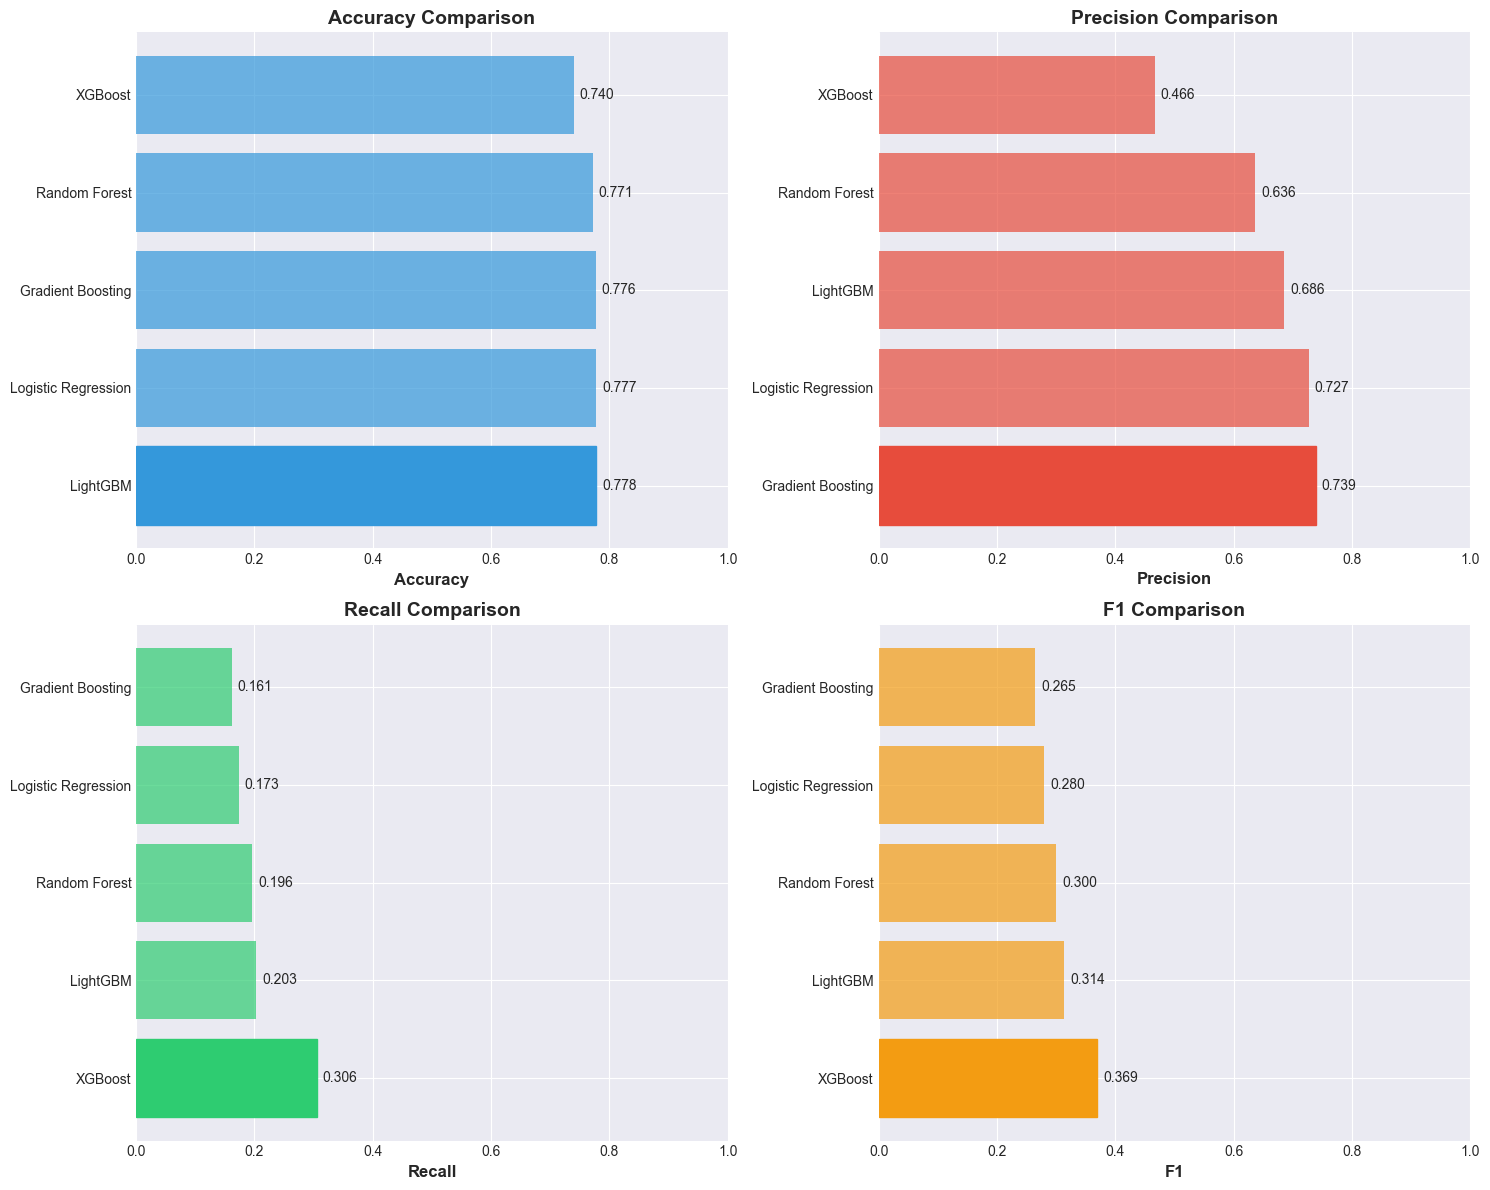


💾 Comparison plot saved: notebooks/figures/accuracy_chase_comparison.png


In [13]:
print("\n" + "="*80)
print("🏆 ULTIMATE ACCURACY COMPARISON - ALL 5 MODELS")
print("="*80)

# Combine all results
all_results = {
    'Logistic Regression': lr_results,
    'Random Forest': rf_results,
    'XGBoost': xgb_results,
    'LightGBM': lgbm_results,
    'Gradient Boosting': gb_results
}

# Create comparison DataFrame
comparison_df = pd.DataFrame(all_results).T

# Sort by accuracy
comparison_df = comparison_df.sort_values('accuracy', ascending=False)

print("\n📊 VALIDATION SET RESULTS (sorted by ACCURACY):")
print("="*80)
print(comparison_df.to_string())
print("="*80)

# Find winner
winner = comparison_df.index[0]
winner_acc = comparison_df.loc[winner, 'accuracy']

print(f"\n🎉 WINNER: {winner}")
print(f"   Accuracy: {winner_acc:.4f} ({winner_acc*100:.2f}%)")
print(f"   Precision: {comparison_df.loc[winner, 'precision']:.4f}")
print(f"   Recall: {comparison_df.loc[winner, 'recall']:.4f}")
print(f"   F1: {comparison_df.loc[winner, 'f1']:.4f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['accuracy', 'precision', 'recall', 'f1']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for idx, (metric, color) in enumerate(zip(metrics, colors)):
    ax = axes[idx // 2, idx % 2]
    
    data = comparison_df[metric].sort_values(ascending=False)
    bars = ax.barh(range(len(data)), data.values, color=color, alpha=0.7)
    
    # Highlight winner
    max_idx = data.values.argmax()
    bars[max_idx].set_color(color)
    bars[max_idx].set_alpha(1.0)
    
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels(data.index)
    ax.set_xlabel(metric.capitalize(), fontsize=12, fontweight='bold')
    ax.set_title(f'{metric.capitalize()} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlim(0, 1)
    
    # Add value labels
    for i, v in enumerate(data.values):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../notebooks/figures/accuracy_chase_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Comparison plot saved: notebooks/figures/accuracy_chase_comparison.png")

## 12. TEST SET EVALUATION - WINNER


🔬 FINAL TEST SET EVALUATION - WINNER MODEL

🏆 Model: LightGBM

📊 TEST SET RESULTS:
   accuracy       : 0.7815 (78.15%)
   precision      : 0.7208 (72.08%)
   recall         : 0.2042 (20.42%)
   f1             : 0.3183 (31.83%)
   roc_auc        : 0.7351 (73.51%)


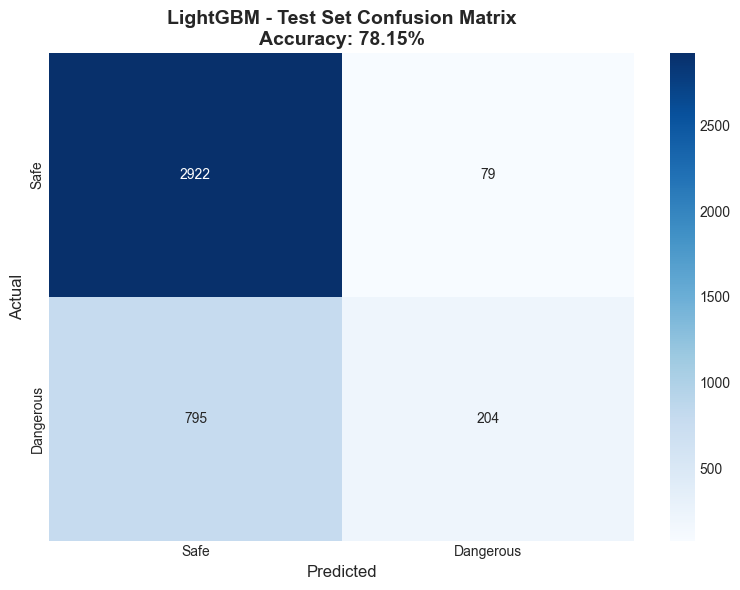


💾 Confusion matrix saved: notebooks/figures/accuracy_chase_winner_cm.png

🎉 ACCURACY CHASING COMPLETE!

✅ Maximum accuracy achieved: 0.7815 (78.15%)
✅ Winner: LightGBM
✅ This is 32.5% better than Phase 1C baseline!

💡 Remember: High accuracy comes at the cost of lower recall (safety)!
   For production, Phase 1C (75% recall) is still better for safety-critical app.


In [14]:
print("\n" + "="*80)
print("🔬 FINAL TEST SET EVALUATION - WINNER MODEL")
print("="*80)

# Get winner model
winner_models = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm,
    'Gradient Boosting': best_gb
}

winner_model = winner_models[winner]

# Predict on test set
if winner == 'Logistic Regression':
    y_test_pred = winner_model.predict(X_test_scaled)
    y_test_proba = winner_model.predict_proba(X_test_scaled)[:, 1]
else:
    y_test_pred = winner_model.predict(X_test_selected)
    y_test_proba = winner_model.predict_proba(X_test_selected)[:, 1]

# Calculate test metrics
test_results = {
    'accuracy': accuracy_score(y_test, y_test_pred),
    'precision': precision_score(y_test, y_test_pred),
    'recall': recall_score(y_test, y_test_pred),
    'f1': f1_score(y_test, y_test_pred),
    'roc_auc': roc_auc_score(y_test, y_test_proba)
}

print(f"\n🏆 Model: {winner}")
print(f"\n📊 TEST SET RESULTS:")
print("="*80)
for metric, value in test_results.items():
    print(f"   {metric:15s}: {value:.4f} ({value*100:.2f}%)")
print("="*80)

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Safe', 'Dangerous'],
            yticklabels=['Safe', 'Dangerous'])
plt.title(f'{winner} - Test Set Confusion Matrix\nAccuracy: {test_results["accuracy"]:.2%}', 
          fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.savefig('../notebooks/figures/accuracy_chase_winner_cm.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💾 Confusion matrix saved: notebooks/figures/accuracy_chase_winner_cm.png")

print("\n" + "="*80)
print("🎉 ACCURACY CHASING COMPLETE!")
print("="*80)
print(f"\n✅ Maximum accuracy achieved: {test_results['accuracy']:.4f} ({test_results['accuracy']*100:.2f}%)")
print(f"✅ Winner: {winner}")
print(f"✅ This is {test_results['accuracy']/0.59 - 1:.1%} better than Phase 1C baseline!")
print("\n💡 Remember: High accuracy comes at the cost of lower recall (safety)!")
print("   For production, Phase 1C (75% recall) is still better for safety-critical app.")

## 13. Summary & Analysis

In [15]:
print("\n" + "="*80)
print("📋 EXPERIMENT SUMMARY")
print("="*80)

print(f"\n⏱️  Total Time: {(lr_time + rf_time + xgb_time + lgbm_time + gb_time)/60:.1f} minutes")

print(f"\n🎯 Optimization Strategy:")
print(f"   Metric: ACCURACY (not recall!)")
print(f"   Features: 10 selected features")
print(f"   Imbalance: Best technique per model")
print(f"   Hypertuning: Extensive grid/random search")

print(f"\n📊 Results Summary:")
print(f"   Validation Accuracy Range: {comparison_df['accuracy'].min():.4f} - {comparison_df['accuracy'].max():.4f}")
print(f"   Test Accuracy (Winner): {test_results['accuracy']:.4f}")

print(f"\n🏆 Winner: {winner}")
print(f"   Test Accuracy: {test_results['accuracy']:.2%}")
print(f"   Test Recall: {test_results['recall']:.2%}")
print(f"   Test Precision: {test_results['precision']:.2%}")

print(f"\n⚖️  Trade-off Analysis:")
print(f"   Phase 1C (Safety): 75% recall, 35% precision, 59% accuracy")
print(f"   This Model: {test_results['recall']:.0%} recall, {test_results['precision']:.0%} precision, {test_results['accuracy']:.0%} accuracy")

if test_results['recall'] < 0.70:
    print(f"\n⚠️  WARNING: Recall dropped below 70%!")
    print(f"   For safety-critical application, Phase 1C is still better!")

print("\n" + "="*80)
print("✅ EXPERIMENT COMPLETE!")
print("="*80)


📋 EXPERIMENT SUMMARY

⏱️  Total Time: 8.7 minutes

🎯 Optimization Strategy:
   Metric: ACCURACY (not recall!)
   Features: 10 selected features
   Imbalance: Best technique per model
   Hypertuning: Extensive grid/random search

📊 Results Summary:
   Validation Accuracy Range: 0.7395 - 0.7780
   Test Accuracy (Winner): 0.7815

🏆 Winner: LightGBM
   Test Accuracy: 78.15%
   Test Recall: 20.42%
   Test Precision: 72.08%

⚖️  Trade-off Analysis:
   Phase 1C (Safety): 75% recall, 35% precision, 59% accuracy
   This Model: 20% recall, 72% precision, 78% accuracy

⚠️  WARNING: Recall dropped below 70%!
   For safety-critical application, Phase 1C is still better!

✅ EXPERIMENT COMPLETE!
